In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt 
import warnings

warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

%matplotlib inline

In [2]:
df = pd.read_csv("/kaggle/input/us-house-price-dataset/cleaned_dataset.csv")
df.head()

,Building Size,County,Land Size,Price,Year Built,bathroom(s),bedroom(s),livingroom(s)
0,149.85,Chatham County,1173.59,279900,1997,2,3,0
1,284.56,Stanislaus,2221.50,745000,2025,5,4,1
2,115.94,Monroe,2387.65,225000,1964,2,3,0
3,309.74,Wake,1214.06,724900,2014,4,5,0
4,165.00,Grant,809.37,247900,1970,3,3,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1582 entries, 0 to 1581
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Building Size  1582 non-null   float64
 1   County         1582 non-null   object 
 2   Land Size      1582 non-null   float64
 3   Price          1582 non-null   int64  
 4   Year Built     1582 non-null   int64  
 5   bathroom(s)    1582 non-null   int64  
 6   bedroom(s)     1582 non-null   int64  
 7   livingroom(s)  1582 non-null   int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 99.0+ KB


In [4]:
df.describe()

,Building Size,Land Size,Price,Year Built,bathroom(s),bedroom(s),livingroom(s)
count,1582.000000,1.582000e+03,1.582000e+03,1582.000000,1582.000000,1582.000000,1582.000000
mean,200.243786,3.165670e+04,5.878035e+05,1983.534134,2.601138,3.427307,0.279393
std,110.008516,9.904670e+05,9.346543e+05,33.736427,1.133504,0.981531,0.448843
min,0.370000,4.047000e+01,1.150000e+03,1800.000000,0.000000,0.000000,0.000000
25%,131.550000,6.136500e+02,2.699000e+05,1963.000000,2.000000,3.000000,0.000000
50%,172.565000,1.011720e+03,4.049995e+05,1990.500000,2.000000,3.000000,0.000000
75%,237.757500,2.428120e+03,6.180000e+05,2007.000000,3.000000,4.000000,1.000000
max,1518.960000,3.934762e+07,2.180000e+07,2026.000000,10.000000,10.000000,1.000000


In [5]:
df.describe(include="object")

,County
count,1582
unique,563
top,Lee
freq,32


In [6]:
df.isna().sum()

Building Size    0
County           0
Land Size        0
Price            0
Year Built       0
bathroom(s)      0
bedroom(s)       0
livingroom(s)    0
dtype: int64

- Lucky me, there is no missing values 

In [7]:
numerical_features = df.select_dtypes(include=["int64", "float64"])
categorical_features = df.select_dtypes(include="object")

print("Number of numerical features: ", numerical_features.columns.size)
print("Number of categorical features: ", categorical_features.columns.size)

Number of numerical features:  7
Number of categorical features:  1


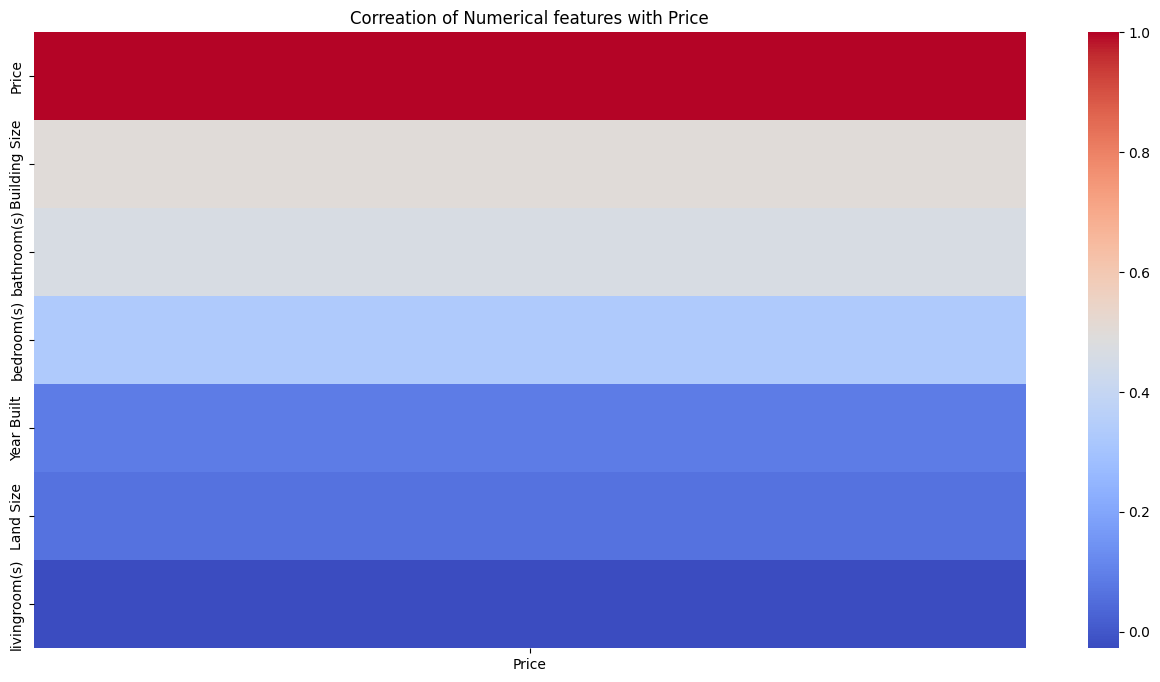

In [10]:
# Correlation between target feature "Price" and numerical independent features : 

corrs = numerical_features.corr()[["Price"]].sort_values(by="Price", ascending=False)

plt.figure(figsize=(16,8))
sns.heatmap(corrs, 
           cmap='coolwarm',
           fmt=".2f")


plt.title("Correation of Numerical features with Price")
plt.show()

## Visualization & Distrubution

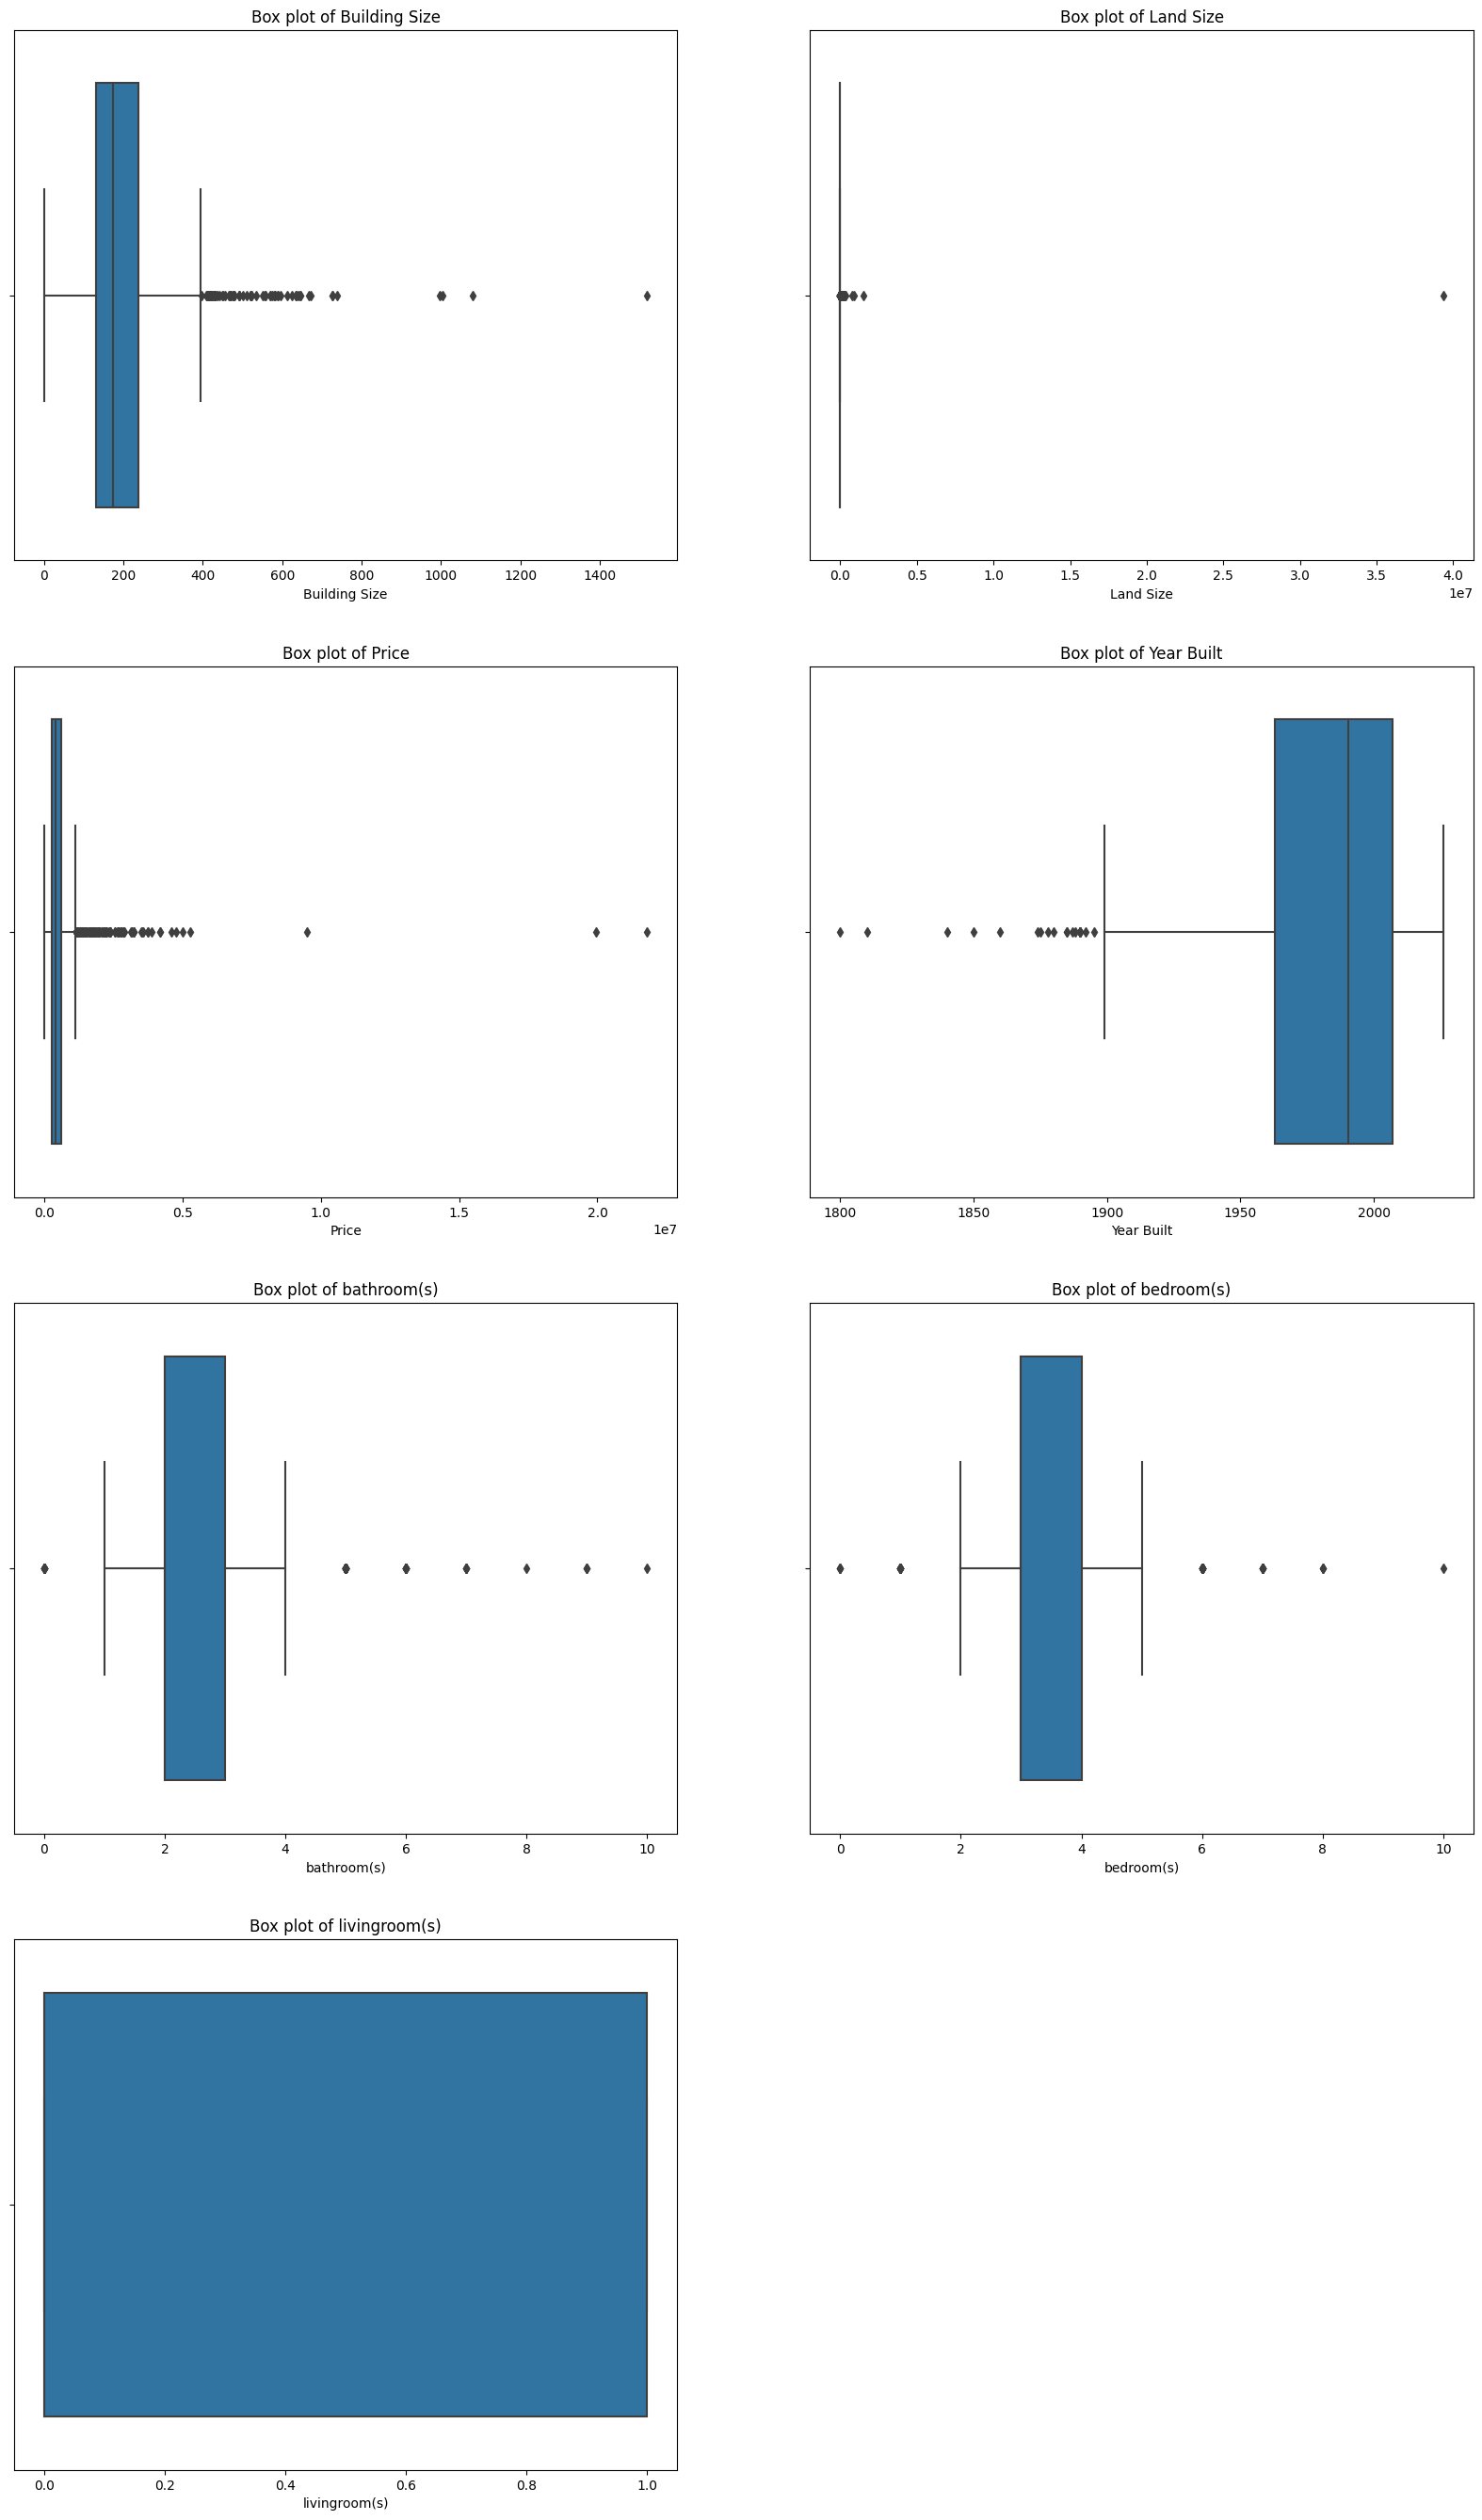

In [11]:
plt.figure(figsize=(20, 60))

for n, feature in enumerate(numerical_features.columns): 
    plt.subplot(7, 2, n + 1)
    sns.boxplot(data=df, x=feature)
    plt.title(f"Box plot of {feature}")
    plt.xlabel(feature)

plt.show()

Out of 7 features, 6 of them have outliers, that are going to be handled later

In [8]:
df_copy = df 
df_copy["Land Size"] = df_copy["Land Size"] / 1.0e7
df_copy["Price"] = df_copy["Price"] / 1.0e7

In [ ]:
for col in numerical_features.columns: 
    plt.figure(figsize=(16, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df_copy[col], kde=True)
    plt.subplot(1, 2, 2)
    sns.scatterplot(data=df_copy, x=col, y="Price")

plt.show()

In [10]:
categorical_features.columns

Index(['County'], dtype='object')

In [35]:
county_col = df["County"]
county_col = county_col.value_counts()[:14]
county_col

Index(['Lee', 'Maricopa', 'Jefferson', 'Mohave', 'Jackson', 'Hamilton',
       'Los Angeles', 'Wake', 'Orange', 'Marion', 'Washington', 'Bexar',
       'Polk', 'Clark'],
      dtype='object', name='County')

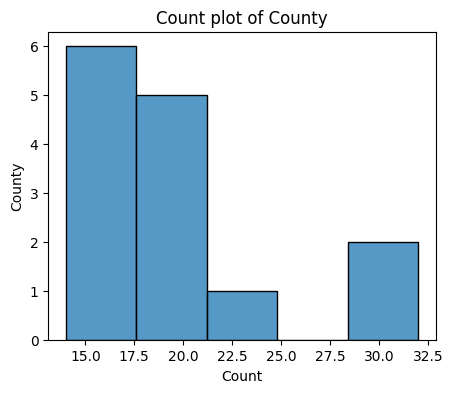

In [28]:

for col in categorical_features.columns: 
    plt.figure(figsize=(5,4))
    sns.histplot(x=county_col, palette='viridis')
    plt.title(f"Count plot of {col}")
    plt.xlabel("Count")
    plt.ylabel(f"{col}")

plt.show()